## **Module H2: Ordinary Differential Equations - Continued**

**22.4: Numerical Error and Instability**

**Accuracy** refers to a scheme’s ability to get close to the exact solution, which is usually unknown, as a function of the step size $ℎ$. The **stability** of an integration scheme is its ability to keep the error from growing as it integrates forward in time. If the error does not grow, then the scheme is stable; otherwise it is unstable. 

**Example:**Use the Euler Explicit, Euler Implicit, and Trapezoidal Formulas to solve the pendulum equation over the time interval [0,5] in increments of 0.1 and for an initial solution of $\begin{align}
S(0) = 
\left[\begin{array}{c}
0 \\ 1
\end{array}\right]
& 
\end{align} $.
 For the model parameters using $\sqrt{\frac{g}{l}}=4$. Plot the approximate solution on a single graph.

In [69]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

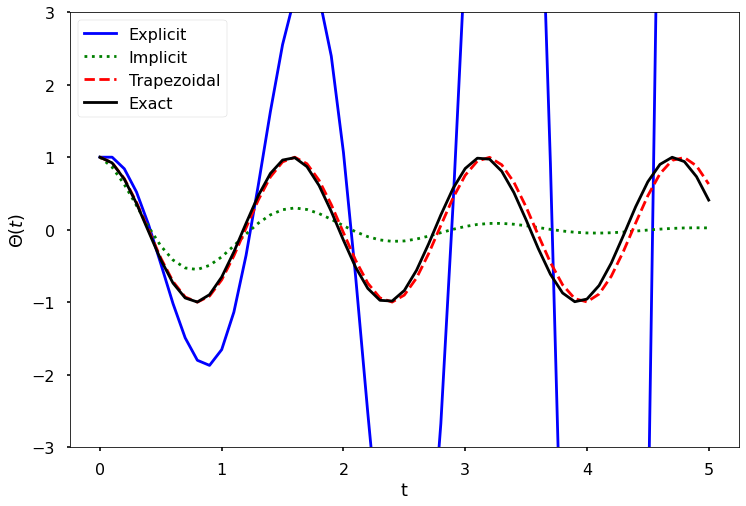

In [70]:
# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

**Conclusion**:The exact solution is a pure cosine wave. The Explicit Euler scheme is clearly unstable. The Implicit Euler scheme decays exponentially, which is not correct. The Trapezoidal method captures the solution correctly, with a small phase shift as time increases.

**22.5.1: Predictor-Corrector Methods**

The **midpoint** method has a **predictor** step:
$$
𝑆(t_\mathrm{j}+\frac{h}{2})=𝑆(t_\mathrm{j})+\frac{h}{2}F(t_\mathrm{j}, S(t_\mathrm{j}))
$$
which is the **prediction** of the solution value halfway between $t_\mathrm{j}$ and $t_\mathrm{j+1}$.

It then computes the corrector step:

$$
𝑆(t_\mathrm{j+1})=𝑆(t_\mathrm{j})+hF(t_\mathrm{j}+\frac{h}{2},  S(t_\mathrm{j}+\frac{h}{2}))
$$
which computes the solution at $𝑆(t_\mathrm{j+1})$ from $𝑆(t_\mathrm{j})$ but using the derivative from $S(t_\mathrm{j}+\frac{h}{2})$.


**22.5.2: Runge Kutta Method:**
**Runge Kutta** (RK) methods are one of the most widely used methods for solving ODEs, which is based on truncated Taylor series, but not require computation of these higher derivatives.



**22.5.2.1:Second order Runge Kutta method:**


Let $\frac{𝑑𝑆(𝑡)}{𝑑𝑡}=𝐹(𝑡,𝑆(𝑡))$, then we can assume an integration formula the form of

$$
S(t+h)=S(t)+c_\mathrm{1}F(t, S(t))h + c_\mathrm{2}F[t+ph, S(t)+qhF(t, S(t))]h
$$

Once populat chioce is: 
$$c_\mathrm{1}=\frac{1}{2}, c_\mathrm{2}=\frac{1}{2}, p=1, q=1$$

$$
k_\mathrm{1}= F(t_\mathrm{j}, S(t_\mathrm{j}))
$$

$$
k_\mathrm{2}= F(t_\mathrm{j}+ph, S(t_\mathrm{j})+qhk_\mathrm{1})
$$

$$
S(t_\mathrm{j+1}) = S(t_\mathrm{j})+ \frac{1}{2}(k_\mathrm{1}+k_\mathrm{2})h
$$

**22.5.2.2: Fourth-order Runge Kutta method:**

$$
k_\mathrm{1}= F(t_\mathrm{j}, S(t_\mathrm{j}))
$$

$$
k_\mathrm{2}= F(t_\mathrm{j}+\frac{1}{2}h, S(t_\mathrm{j})+\frac{1}{2}k_\mathrm{1}h)
$$

$$
k_\mathrm{3}= F(t_\mathrm{j}+\frac{1}{2}h, S(t_\mathrm{j})+\frac{2}{2}k_\mathrm{1}h)
$$

$$
k_\mathrm{4}= F(t_\mathrm{j}+h, S(t_\mathrm{j})+k_\mathrm{3}h)
$$

$$
S(t_\mathrm{j+1}) = S(t_\mathrm{j})+ \frac{h}{6}(k_\mathrm{1}+2k_\mathrm{2}+2k_\mathrm{3}+k_\mathrm{4})
$$

**22.6: Python ODE Solvers:** scipy.integrate.solve_ivp 

Let 𝐹 be a function object to the function that computes 

$$
\frac{𝑑𝑆(𝑡)}{𝑑𝑡}=𝐹(𝑡,𝑆(𝑡))
$$

$$
S(t_\mathrm{0}) = S_\mathrm{0}
$$

$t$ is a one-dimensional independent variable (time), $S(t)$ is an n-dimensional vector-valued function (state), and the $F(t, S(t))$  defines the differential equations. $S_\mathrm{0}$ be an initial value for $S$. The function $F$ must have the form $dS=F(t,s)$, although the name does not have to be $F$. The goal is to find the $S(t)$ approximately satisfying the differential equations, given the initial value $S(t_\mathrm{0}) = S_\mathrm{0}$.

The way we use the solver to solve the differential equation is: **solve_ivp(fun, t_span, s0, method = 'RK45', t_eval=None)**

**Example 1**:
Consider the ODE
$$
\frac{𝑑𝑆(𝑡)}{𝑑𝑡}=cos(t)
$$

for an initial value 𝑆0=0. The exact solution to this problem is 𝑆(𝑡)=sin(𝑡). Use **solve_ivp** to approximate the solution to this initial value problem over the interval [0,𝜋]. Plot the approximate solution versus the exact solution and the relative error over time.

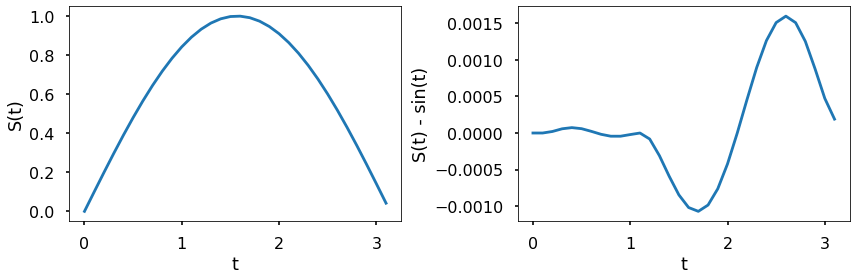

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()



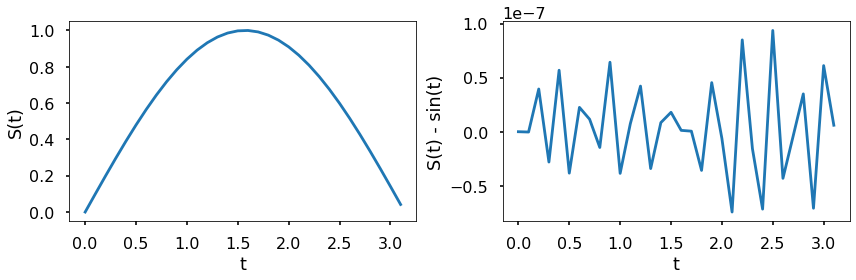

In [72]:
#Using the rtol and atol to make the difference between the approximate and exact solution is less than 1e-7.
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()


**Example 2:**
Let the state of a system be defined by $\begin{align}
S(t) = 
\left[\begin{array}{c}
x(t) \\ y(t)
\end{array}\right]
& 
\end{align} $. and let the evolution of the system be defined by the ODE

$$
\frac{𝑑𝑆(𝑡)}{𝑑𝑡} = \begin{bmatrix}
0 & t^2 \\
-t & 0
\end{bmatrix}\ S(t)
$$

Use **solve_ivp** to solve this ODE for the time interval [0,10] with an initial value of $\begin{align}
S(0) = 
\left[\begin{array}{c}
1 \\ 1
\end{array}\right]
& 
\end{align} $.. Plot the solution in $(x(t), y(t))$.

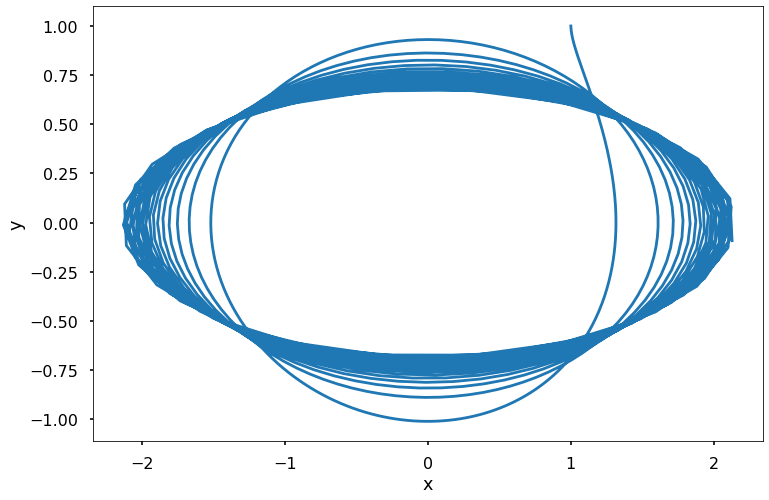

In [73]:
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

###**Exercise**

**(1):** The Lorenz attractor is a system of ordinary differential equations that was originally developed to model convection currents in the atmosphere. The Lorenz equations can be written as:

$$
\frac{dx}{dt} = \sigma (y-x)
$$

$$
\frac{dy}{dt} = x (\rho-z)-y
$$
$$
\frac{dz}{dt} = xy-\beta z
$$

where $x, y$ and $z$ represent position in three dimensions and $\sigma, \rho$ and $\beta$ are scalar parameters of the system.

Write a function my_lorenz(t, S, sigma, rho, beta), where $t$ is a scalar denoting time, $S$ is a (3,) array denoting the position $(𝑥,𝑦,𝑧)$, and 𝑠𝑖𝑔𝑚𝑎, 𝑟ℎ𝑜, and 𝑏𝑒𝑡𝑎 are strictly positive scalars representing  $\sigma, \rho$ and $\beta$. The output argument $dS$ should be the same size as $S$.

In [74]:
import numpy as np
def my_lorenz(t, S, sigma, rho, beta):
    # put your code here
  
  x,y,z = S
 
  dx = sigma*(y-x)
  dy = x*(rho-z)-y
  dz = x*y -beta*z
  dS = [dx, dy, dz]

  return dS


In [75]:
s = np.array([1, 2, 3])
dS = my_lorenz(0, s, 10, 28, 8/3)
dS

[10, 23, -6.0]

**(2):** Write a function 𝑚𝑦_𝑙𝑜𝑟𝑒𝑛𝑧_𝑠𝑜𝑙𝑣𝑒𝑟(𝑡_𝑠𝑝𝑎𝑛,𝑠0,𝑠𝑖𝑔𝑚𝑎,𝑟ℎ𝑜,𝑏𝑒𝑡𝑎) that solves the Lorenz equations using 𝑠𝑜𝑙𝑣𝑒_𝑖𝑣𝑝, the function returns [T, X, Y, Z]. The input argument 𝑡_𝑠𝑝𝑎𝑛 should be a list of the form [𝑡0,𝑡𝑓], where 𝑡0 is the initial time, and 𝑡𝑓 is the final time of consideration. The input argument 𝑠0 should be a (3,) array of the form [𝑥0;𝑦0;𝑧0], where (𝑥0,𝑦0,𝑧0) represents an initial position. Finally, the input arguments 𝑠𝑖𝑔𝑚𝑎, 𝑟ℎ𝑜, and 𝑏𝑒𝑡𝑎 are the scalar parameters 𝜎,𝜌, and 𝛽 of the Lorenz system. The output arguments 𝑇 should be an array of times given as the output argument of 𝑠𝑜𝑙𝑣𝑒_𝑖𝑣𝑝. The output arguments, 𝑋, 𝑌, and 𝑍 should be the numerically integrated solution produced from 𝑚𝑦_𝑙𝑜𝑟𝑒𝑛𝑧 in the previous problem and 𝑠𝑜𝑙𝑣𝑒_𝑖𝑣𝑝.



In [76]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

def my_lorenz_solver(t_span, s0, sigma, rho, beta):
  
  soln = solve_ivp(my_lorenz, t_span, s0, args=(sigma, rho, beta), dense_output=True)
  
  # Interpolate solution onto the time grid, t.
  T = np.linspace(t_span[0],t_span[1], 10000)
  X, Y, Z = soln.sol(T)

  return [T, X, Y, Z]



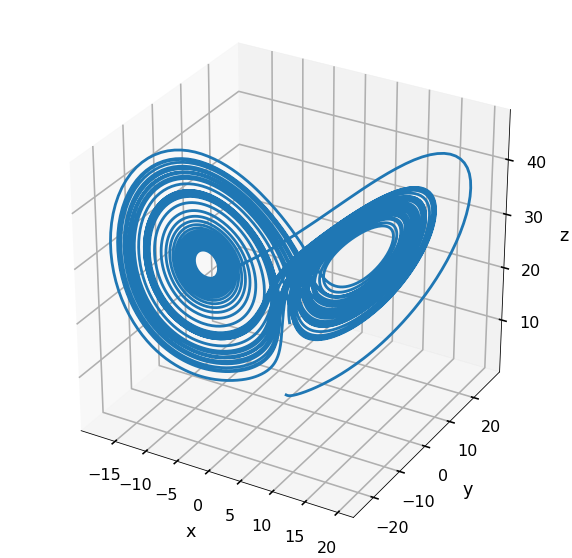

In [77]:
sigma = 10
rho = 28
beta = 8/3
t0 = 0
tf = 50
s0 = np.array([0, 1, 1.05])

[T, X, Y, Z] = my_lorenz_solver([t0, tf], s0, sigma, rho, beta)

from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.plot3D(X, Y, Z)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()

**(3):** Write a function 𝑚𝑦_𝑓𝑜𝑟𝑤𝑎𝑟𝑑_𝑒𝑢𝑙𝑒𝑟(𝑑𝑠,𝑡_𝑠𝑝𝑎𝑛,𝑠0), where ds is a function object, 𝑓(𝑡,𝑠), describing a first-order differential equation, 𝑡_𝑠𝑝𝑎𝑛 is an array of times for which numerical solutions of the differential equation are desired, and s0 is the initial condition of the system. Assume that the size of the state is one. The output argument should be a list of [t, s], such that 𝑡[𝑖]=𝑡_𝑠𝑝𝑎𝑛[𝑖] for all 𝑖, and 𝑠 should be the integrated values of ds at times t. You should perform the integration using the Forward Euler method, $s[t_\mathrm{i}]= s[t_\mathrm{i-1}]+(t_\mathrm{i}-t_\mathrm{i-1})ds(t_\mathrm{i-1}, s[t_\mathrm{i-1}])$
. Note: 𝑠[0] should equal 𝑠0.

In [78]:
import numpy as np
import matplotlib.pyplot as plt

def my_forward_euler(ds, t_span, s0):
    s = np.zeros(len(t_span))
    t = np.zeros(len(t_span))
    s[0]= s0
    t[0]= t_span[0]

    for i in range(1,len(t_span)):
        t[i] = t_span[i]
        s[i] = s[i-1] + ds(t[i-1],s[i-1])*(t[i] - t[i-1])
    
    return [t, s]



In [79]:
#terst case:

t_span = np.linspace(0, 1, 10)
s0 = 1

# Define parameters
f = lambda t, s: t*np.exp(-s)

t_eul, s_eul = my_forward_euler(f, t_span, s0)

print(t_eul)
print(s_eul)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[1.         1.         1.00454172 1.013584   1.02702534 1.04470783
 1.06642355 1.09192262 1.12092255 1.153118  ]


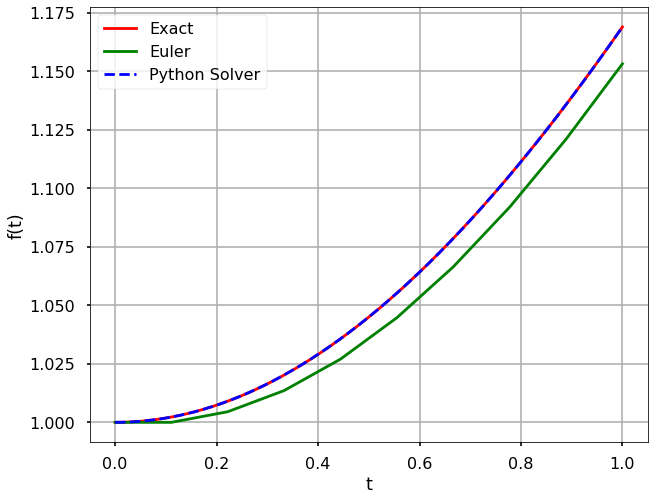

In [80]:
plt.figure(figsize = (10, 8))

# Exact solution
t = np.linspace(0, 1, 1000)
s = np.log(np.exp(s0) + (t**2-t[0])/2)
plt.plot(t, s, 'r', label='Exact')

# Forward Euler
plt.plot(t_eul, s_eul, 'g', label='Euler')

# Python solver
sol = solve_ivp(f, [0, 1], [s0], t_eval=t)
plt.plot(sol.t, sol.y[0], 'b--', \
         label='Python Solver')

plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc=2)
plt.show()

**(4):**Write a function 𝑚𝑦𝑅𝐾4(𝑑𝑠,𝑡𝑠𝑝𝑎𝑛,𝑠0), where the input and output arguments are the same as in problem 3. The function 𝑚𝑦𝑅𝐾4 should numerically integrate ds using the fourth-order Runge-Kutta method.

In [81]:
def myRK4(ds, t_span, s0):
    
    s = np.zeros(len(t_span))
    t = np.zeros(len(t_span))
    s[0]= s0
    t[0]= t_span[0]

    for i in range(0,len(t_span)-1):
        t[i+1] = t_span[i+1]
        h = t[i+1]-t[i]

        k1 = ds (t[i], s[i])
        k2 = ds((t[i]+h/2),(s[i]+1/2*k1*h))
        k3 = ds(t[i]+h/2 , s[i]+1/2*k2*h)
        k4 = ds(t[i]+h , s[i]+k3*h)

        s[i+1] = s[i] + h/6*(k1+2*k2+2*k3+k4)
    
    return [t, s]


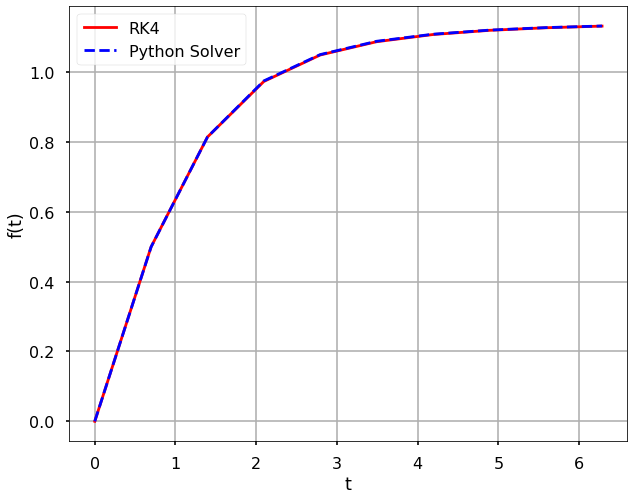

In [82]:
#test case:

f = lambda t, s: np.sin(np.exp(s))/(t+1)
t_span = np.linspace(0, 2*np.pi, 10)
s0 = 0

plt.figure(figsize = (10, 8))

# Runge-Kutta method
t, s = myRK4(f, t_span, s0)
plt.plot(t, s, 'r', label='RK4')

# Python solver
sol = solve_ivp(f, [0, 2*np.pi], [s0], t_eval=t)
plt.plot(sol.t, sol.y[0], \
         'b--', label='Python Solver')

plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc=2)
plt.show()

**(5):**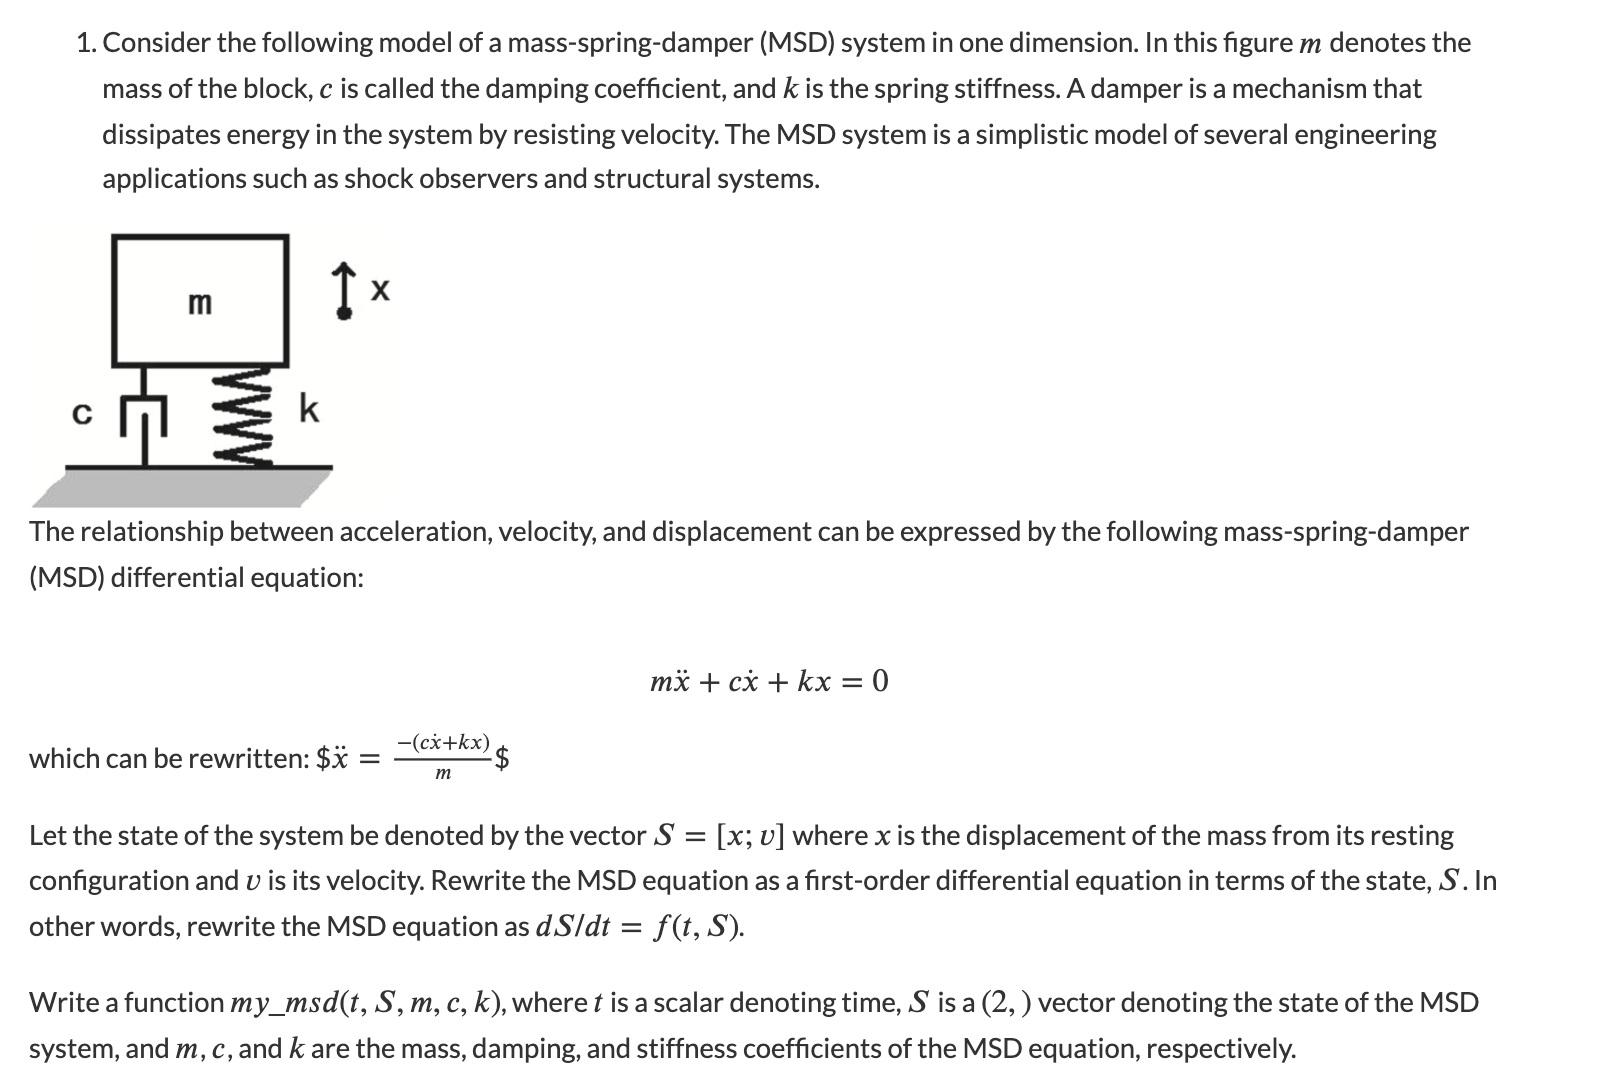

**re-write the MDS:**
v= x' = dxdt
v' = x'' = dvdt
S = [x; v], ds = dSdt = [dxdt, dvdt] = [v, dvdt]
Let the state of a system be defined by $\begin{align}
S(t) = 
\left[\begin{array}{c}
x(t) \\ v(t)
\end{array}\right]
& 
\end{align} $. 

The ODE can be written as:
$$
ds = \frac{𝑑𝑆(𝑡)}{𝑑𝑡} = \left[\begin{array}{c}
dxdt \\ dvdt
\end{array}\right]=\begin{bmatrix}
0 & 1 \\
-\frac{k}{m} & -\frac{c}{m}
\end{bmatrix}\ S(t)
$$


In [83]:
# v= x' = dxdt
# v' = x'' = dvdt
# S = [x; v], ds = dSdt = [dxdt, dvdt] = [v, dvdt]
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from functools import partial
plt.style.use('seaborn-poster')

%matplotlib inline
def my_msd(t, S, m, c, k):
    
    ds = np.dot(np.array([[0, 1], [-k/m, -c/m]]), S)
    
    return ds


In [84]:
my_msd(0, [1, -1], 10, 1, 100)

array([-1. , -9.9])

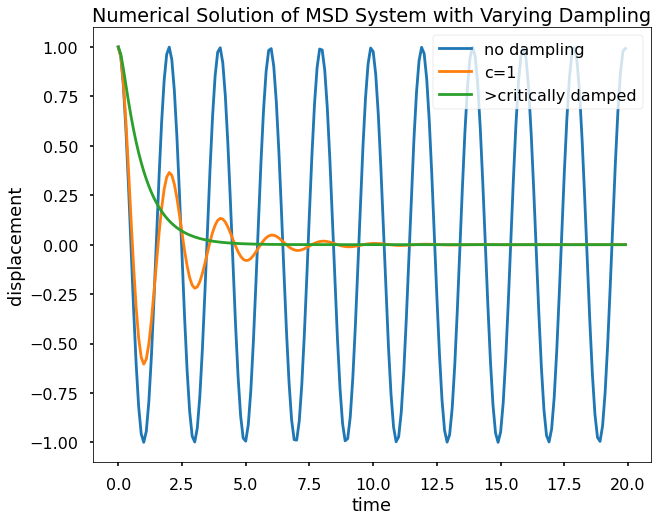

In [85]:
m = 1
k = 10
f = partial(my_msd, m=m, c=0, k=k)
t_e = np.arange(0, 20, 0.1)
sol_1=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

f = partial(my_msd, m=m, c=1, k=k)
sol_2=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

f = partial(my_msd, m=m, c=10, k=k)
sol_3=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

plt.figure(figsize = (10, 8))
plt.plot(sol_1.t, sol_1.y[0])
plt.plot(sol_2.t, sol_2.y[0])
plt.plot(sol_3.t, sol_3.y[0])
plt.title('Numerical Solution of MSD \
System with Varying Dampling')
plt.xlabel('time')
plt.ylabel('displacement')
plt.legend(['no dampling', 'c=1', \
           '>critically damped'], loc=1)